# Part I – Exploratory Data Visualization (Prosper Loans)
_Udacity: Data Analysis Final Project_

**Author:** Reema Kusa  
**Date:** 2025-11-11

This notebook performs **systematic exploratory data analysis** on the **Prosper Loans** dataset. We start with wrangling and data checks, then proceed through **univariate**, **bivariate**, and **multivariate** visualizations, covering all **rubric-required** plots with clear titles, labels, legends, and useful annotations.

## 0. Setup

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set(context="notebook", style="whitegrid")
pd.set_option("display.max_columns", 120)
print("Libraries ready.")


Libraries ready.


## 1. Load Data & Preliminary Wrangling
Place the Prosper CSV in the project folder and set the path below. Recommended filename: `prosperLoanData.csv` (as used in Udacity lessons).

In [10]:
# ---- Configure your data path here ----
from pathlib import Path
import pandas as pd

DATA_PATHS = [
    Path('prosperLoanData.csv'),             # If file is next to notebook
    Path('data/prosperLoanData.csv'),        # If file is inside /data folder
    Path('/mnt/data/prosperLoanData.csv')    # fallback option
]

csv_path = None
for p in DATA_PATHS:
    if p.exists():
        csv_path = p
        break

if csv_path is None:
    raise FileNotFoundError(
        "Could not find 'prosperLoanData.csv'. Please place it next to the notebook or inside a 'data' folder."
    )

print(f'Loading: {csv_path}')
df = pd.read_csv(csv_path)

print(df.shape)
df.head()


Loading: data\prosperLoanData.csv
(113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

### 1.1 Column selection & type fixes
We keep commonly used variables for clarity (you can add more as needed).

In [11]:
keep_cols = [
    'LoanStatus','ProsperRating (Alpha)','ProsperScore','BorrowerRate','BorrowerAPR','Term',
    'LoanOriginalAmount','MonthlyLoanPayment','EmploymentStatus','IsBorrowerHomeowner',
    'StatedMonthlyIncome','DebtToIncomeRatio','IncomeRange','ListingCategory (numeric)',
    'CreditScoreRangeLower','CreditScoreRangeUpper','DelinquenciesLast7Years','Recommendations',
    'CurrentCreditLines','OpenCreditLines','TotalCreditLinespast7years','TradesNeverDelinquent (percentage)'
]
existing_cols = [c for c in keep_cols if c in df.columns]
df = df[existing_cols].copy()

# Clean column names (optional)
df.columns = [c.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_') for c in df.columns]

# Categorical ordering for ProsperRating (Alpha): HR < E < D < C < B < A < AA
if 'ProsperRating_Alpha' in df.columns:
    pr_order = ['HR','E','D','C','B','A','AA']
    df['ProsperRating_Alpha'] = pd.Categorical(df['ProsperRating_Alpha'], categories=pr_order, ordered=True)

# IncomeRange categorical ordering
if 'IncomeRange' in df.columns:
    inc_order = ['Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
    df['IncomeRange'] = pd.Categorical(df['IncomeRange'], categories=inc_order, ordered=True)

# ListingCategory numeric to categorical mapping (if present)
listing_map = {
    0:'Not Available',1:'Debt Consolidation',2:'Home Improvement',3:'Business',4:'Personal Loan',
    5:'Student Use',6:'Auto',7:'Other',8:'Baby&Adoption',9:'Boat',10:'Cosmetic Procedure',11:'Engagement Ring',
    12:'Green Loans',13:'Household Expenses',14:'Large Purchases',15:'Medical/Dental',16:'Motorcycle',
    17:'RV',18:'Taxes',19:'Vacation',20:'Wedding Loans'
}
if 'ListingCategory_numeric' in df.columns:
    df['ListingCategory'] = df['ListingCategory_numeric'].map(listing_map).fillna('Other').astype('category')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 23 columns):
 #   Column                            Non-Null Count   Dtype   
---  ------                            --------------   -----   
 0   LoanStatus                        113937 non-null  object  
 1   ProsperRating_Alpha               84853 non-null   category
 2   ProsperScore                      84853 non-null   float64 
 3   BorrowerRate                      113937 non-null  float64 
 4   BorrowerAPR                       113912 non-null  float64 
 5   Term                              113937 non-null  int64   
 6   LoanOriginalAmount                113937 non-null  int64   
 7   MonthlyLoanPayment                113937 non-null  float64 
 8   EmploymentStatus                  111682 non-null  object  
 9   IsBorrowerHomeowner               113937 non-null  bool    
 10  StatedMonthlyIncome               113937 non-null  float64 
 11  DebtToIncomeRatio                 10538

### 1.2 Quick data quality checks

In [12]:
# Missingness overview
miss = df.isna().mean().sort_values(ascending=False).head(20)
print(miss)

# Simple numeric summary
df.describe().T.head(12)


ProsperScore                        0.255264
ProsperRating_Alpha                 0.255264
DebtToIncomeRatio                   0.075077
IncomeRange                         0.067941
OpenCreditLines                     0.066739
CurrentCreditLines                  0.066739
TradesNeverDelinquent_percentage    0.066212
EmploymentStatus                    0.019792
DelinquenciesLast7Years             0.008689
TotalCreditLinespast7years          0.006117
CreditScoreRangeLower               0.005187
CreditScoreRangeUpper               0.005187
BorrowerAPR                         0.000219
Recommendations                     0.000000
LoanStatus                          0.000000
ListingCategory_numeric             0.000000
StatedMonthlyIncome                 0.000000
IsBorrowerHomeowner                 0.000000
MonthlyLoanPayment                  0.000000
LoanOriginalAmount                  0.000000
dtype: float64


,count,mean,std,min,25%,50%,75%,max
ProsperScore,84853.0,5.950067,2.376501,1.00000,4.000000,6.000000,8.00000,1.100000e+01
BorrowerRate,113937.0,0.192764,0.074818,0.00000,0.134000,0.184000,0.25000,4.975000e-01
BorrowerAPR,113912.0,0.218828,0.080364,0.00653,0.156290,0.209760,0.28381,5.122900e-01
Term,113937.0,40.830248,10.436212,12.00000,36.000000,36.000000,36.00000,6.000000e+01
LoanOriginalAmount,113937.0,8337.013850,6245.800580,1000.00000,4000.000000,6500.000000,12000.00000,3.500000e+04
MonthlyLoanPayment,113937.0,272.475783,192.697812,0.00000,131.620000,217.740000,371.58000,2.251510e+03
StatedMonthlyIncome,113937.0,5608.025568,7478.497275,0.00000,3200.333333,4666.666667,6825.00000,1.750003e+06
DebtToIncomeRatio,105383.0,0.275947,0.551759,0.00000,0.140000,0.220000,0.32000,1.001000e+01
ListingCategory_numeric,113937.0,2.774209,3.996797,0.00000,1.000000,1.000000,3.00000,2.000000e+01
CreditScoreRangeLower,113346.0,685.567731,66.458275,0.00000,660.000000,680.000000,720.00000,8.800000e+02


## 2. Univariate Exploration

### Q1: ما توزيع **LoanOriginalAmount**؟ (Histogram – Required)

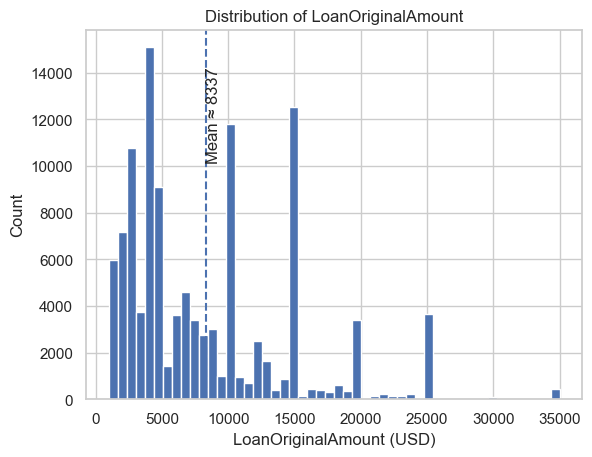

In [13]:
plt.figure()
plt.hist(df['LoanOriginalAmount'].dropna(), bins=50)
plt.title("Distribution of LoanOriginalAmount")
plt.xlabel("LoanOriginalAmount (USD)")
plt.ylabel("Count")
mean_val = df['LoanOriginalAmount'].mean()
plt.axvline(mean_val, linestyle='--')
plt.text(mean_val, plt.ylim()[1]*0.9, f"Mean ≈ {mean_val:.0f}", rotation=90, va="top")
plt.show()


**Observation:** عادةً سنلاحظ قِيَمًا مركّزة على قروض متوسطة مع ذيول لليمين (قروض كبيرة).

### Q2: ما توزيع **BorrowerRate**؟ (Histogram)

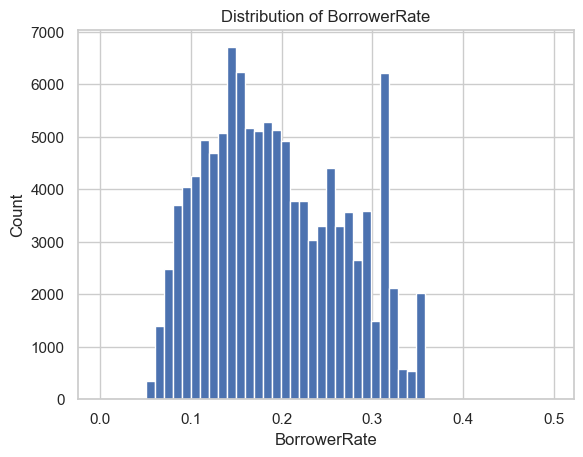

In [14]:
plt.figure()
plt.hist(df['BorrowerRate'].dropna(), bins=50)
plt.title("Distribution of BorrowerRate")
plt.xlabel("BorrowerRate")
plt.ylabel("Count")
plt.show()


### Q3: عدد القيم لكل **LoanStatus** (Count Plot)

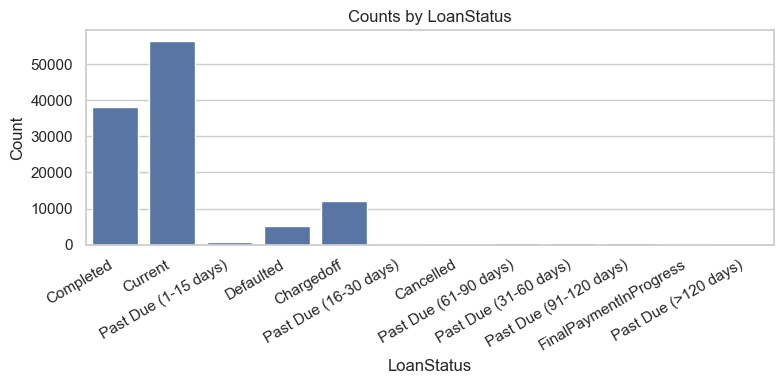

In [15]:
if 'LoanStatus' in df.columns:
    plt.figure(figsize=(8,4))
    sns.countplot(x='LoanStatus', data=df)
    plt.xticks(rotation=30, ha='right')
    plt.title("Counts by LoanStatus")
    plt.xlabel("LoanStatus")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


## 3. Bivariate Exploration

### Q4: العلاقة بين **LoanOriginalAmount** و **BorrowerRate** (Scatter – Required)

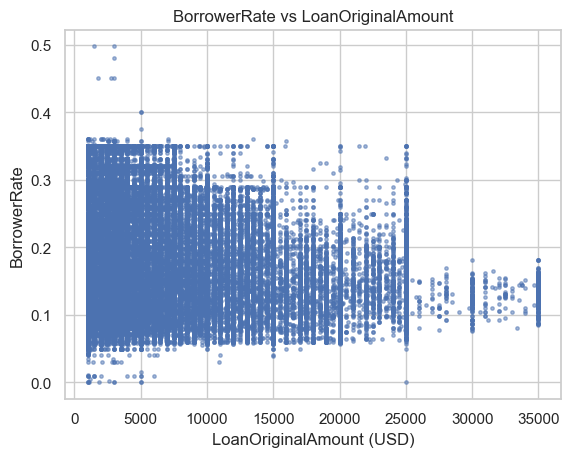

In [16]:
plt.figure()
plt.scatter(df['LoanOriginalAmount'], df['BorrowerRate'], s=6, alpha=0.5)
plt.title("BorrowerRate vs LoanOriginalAmount")
plt.xlabel("LoanOriginalAmount (USD)")
plt.ylabel("BorrowerRate")
plt.show()


### Q5: فروقات **BorrowerRate** حسب **ProsperRating_Alpha** (Box Plot – Required)

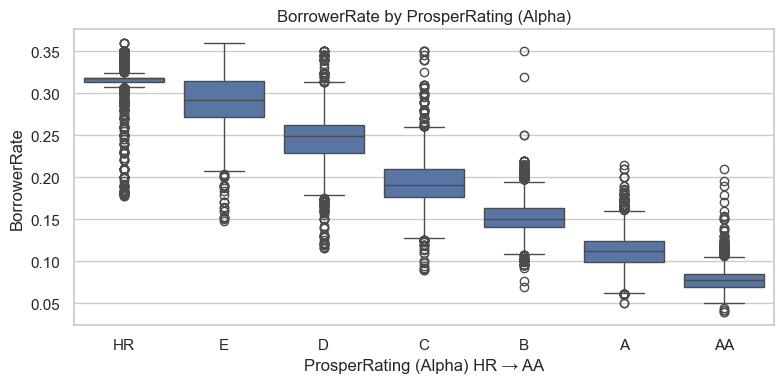

In [17]:
if 'ProsperRating_Alpha' in df.columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='ProsperRating_Alpha', y='BorrowerRate', data=df)
    plt.title("BorrowerRate by ProsperRating (Alpha)")
    plt.xlabel("ProsperRating (Alpha) HR → AA")
    plt.ylabel("BorrowerRate")
    plt.tight_layout()
    plt.show()


### Q6: متوسط **BorrowerRate** حسب **Term** (Bar Chart)

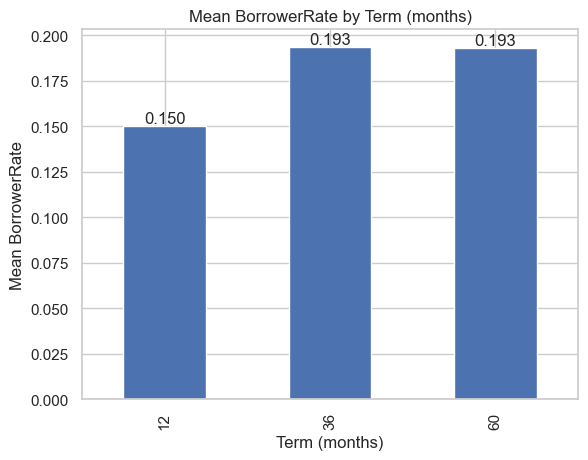

In [18]:
if 'Term' in df.columns:
    mean_rate_by_term = df.groupby('Term')['BorrowerRate'].mean().sort_index()
    plt.figure()
    mean_rate_by_term.plot(kind='bar')
    plt.title("Mean BorrowerRate by Term (months)")
    plt.xlabel("Term (months)")
    plt.ylabel("Mean BorrowerRate")
    for i, v in enumerate(mean_rate_by_term.values):
        plt.text(i, v, f"{v:.3f}", ha="center", va="bottom")
    plt.show()


### Q7: **Clustered Count Plot** – LoanStatus داخل كل ProsperRating

C:\Users\HP\AppData\Local\Temp\ipykernel_13988\2668091858.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ct = df.groupby(['ProsperRating_Alpha','LoanStatus']).size().unstack('LoanStatus').fillna(0)


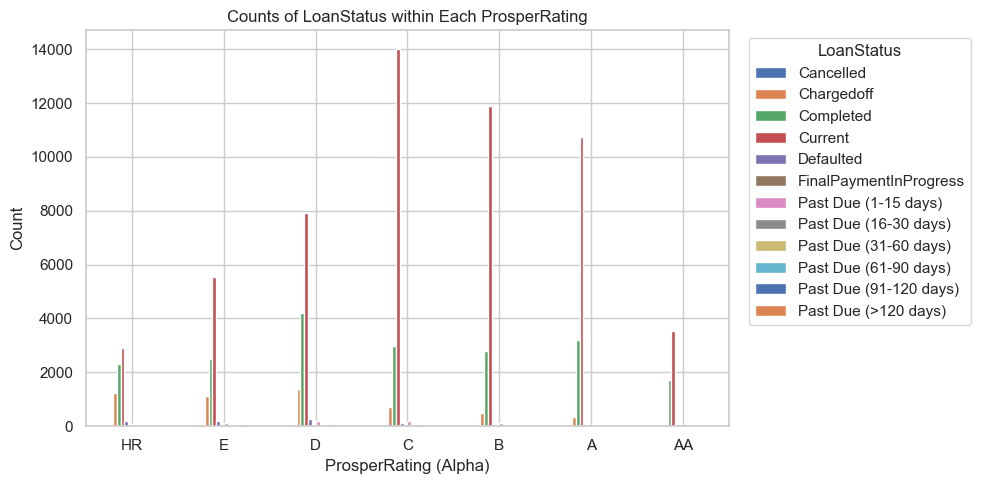

In [19]:
if 'ProsperRating_Alpha' in df.columns and 'LoanStatus' in df.columns:
    ct = df.groupby(['ProsperRating_Alpha','LoanStatus']).size().unstack('LoanStatus').fillna(0)
    ax = ct.plot(kind='bar', figsize=(10,5))
    plt.title("Counts of LoanStatus within Each ProsperRating")
    plt.xlabel("ProsperRating (Alpha)")
    plt.ylabel("Count")
    plt.xticks(rotation=0)
    plt.legend(title="LoanStatus", bbox_to_anchor=(1.02,1), loc="upper left")
    plt.tight_layout()
    plt.show()


### Q8: Heatmap – ترابط المتغيرات الرقمية

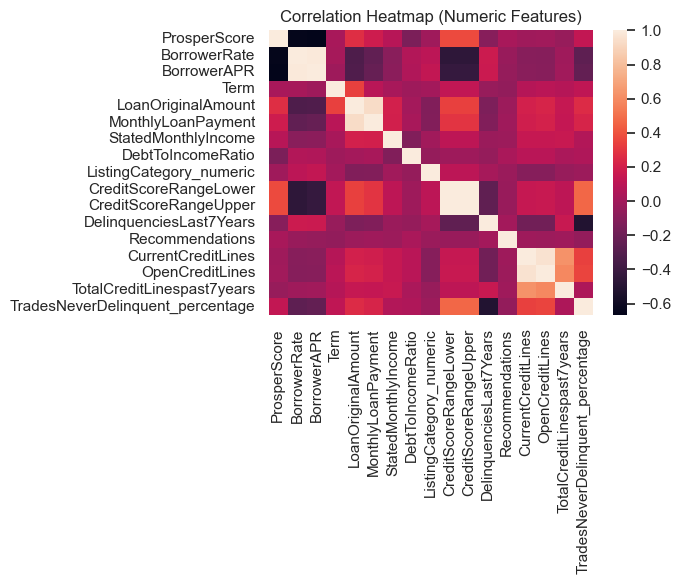

In [20]:
num = df.select_dtypes(include=[np.number])
corr = num.corr()
plt.figure(figsize=(7,6))
sns.heatmap(corr)
plt.title("Correlation Heatmap (Numeric Features)")
plt.tight_layout()
plt.show()


## 4. Multivariate Exploration

### Q9: Facet Plot (Required) – BorrowerRate vs LoanOriginalAmount مفصول حسب ProsperRating

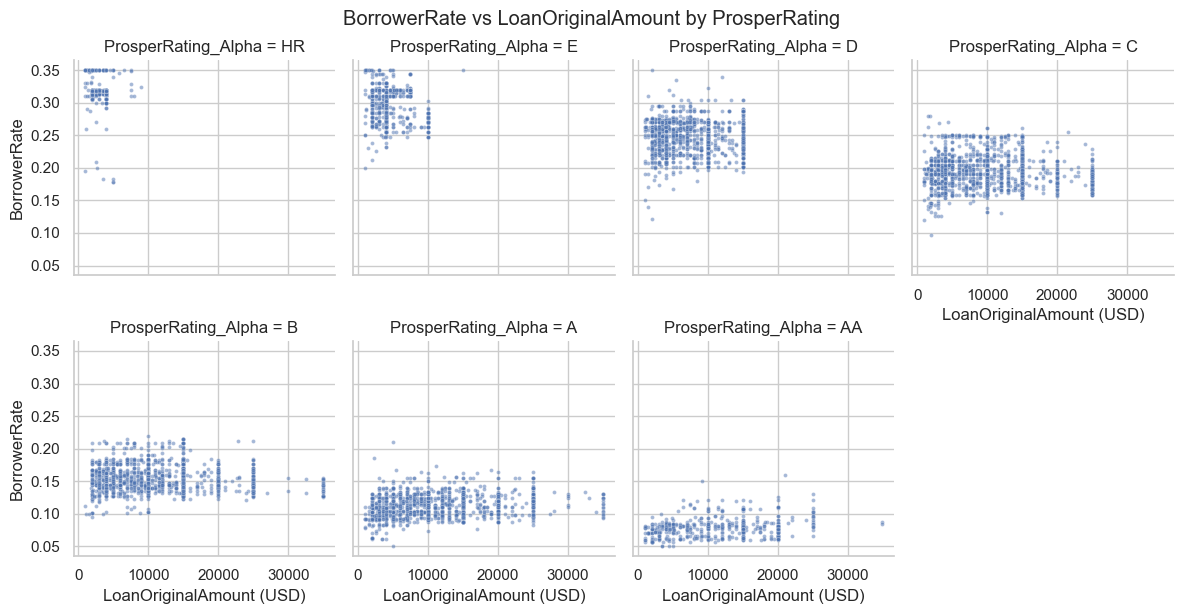

In [21]:
if 'ProsperRating_Alpha' in df.columns:
    sample = df.sample(min(len(df), 10000), random_state=42)
    g = sns.FacetGrid(sample, col="ProsperRating_Alpha", col_wrap=4, height=3, sharex=True, sharey=True)
    g.map_dataframe(sns.scatterplot, x="LoanOriginalAmount", y="BorrowerRate", s=8, alpha=0.5)
    g.set_axis_labels("LoanOriginalAmount (USD)", "BorrowerRate")
    g.fig.suptitle("BorrowerRate vs LoanOriginalAmount by ProsperRating", y=1.02)
    plt.show()


### Q10: Plot Matrix (Pair Plot) – عيّنة لتفادي الازدحام

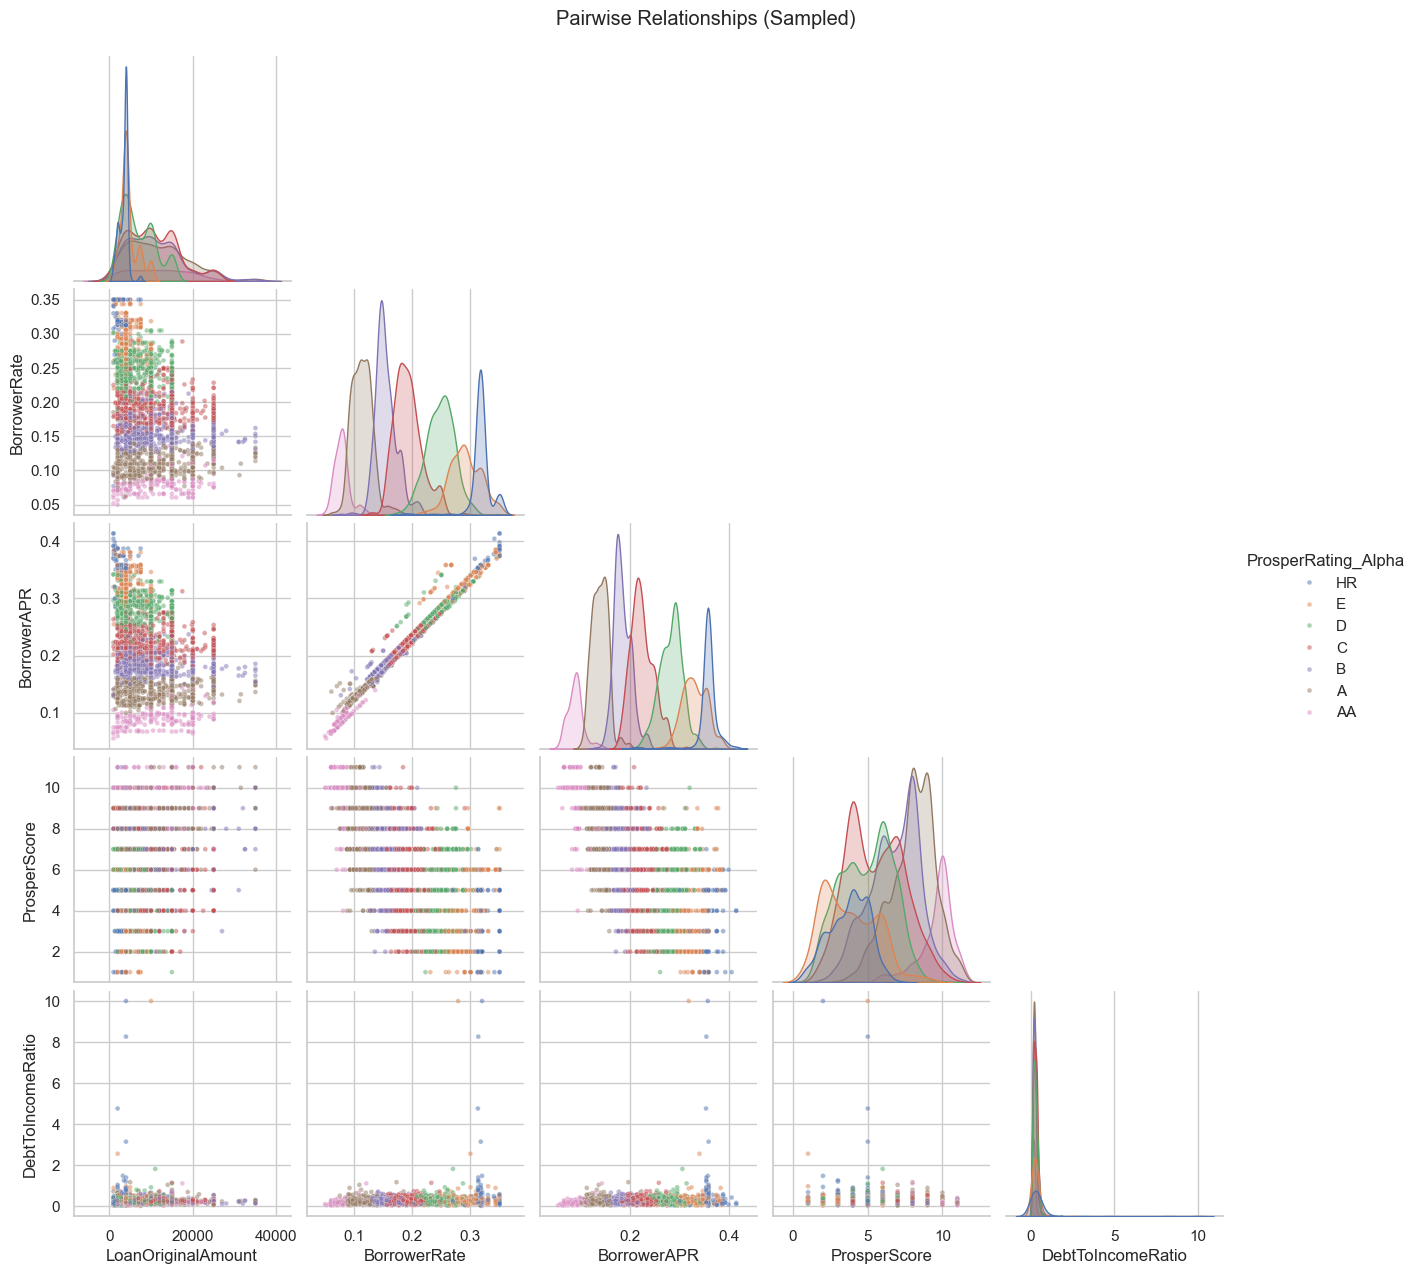

In [22]:
vars_ = [v for v in ['LoanOriginalAmount','BorrowerRate','BorrowerAPR','ProsperScore','DebtToIncomeRatio'] if v in df.columns]
if len(vars_) >= 3:
    sample2 = df[vars_ + (['ProsperRating_Alpha'] if 'ProsperRating_Alpha' in df.columns else [])].dropna().sample(3000, random_state=7)
    g = sns.pairplot(sample2, vars=vars_, hue=('ProsperRating_Alpha' if 'ProsperRating_Alpha' in sample2.columns else None), corner=True, plot_kws={"alpha":0.5, "s":12})
    g.fig.suptitle("Pairwise Relationships (Sampled)", y=1.02)
    plt.show()


### Q11: Scatter w/ Multiple Encodings – BorrowerRate vs DebtToIncomeRatio مع hue=ProsperRating

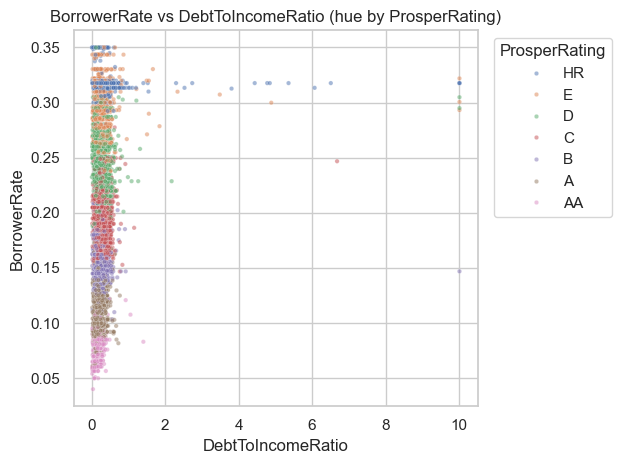

In [23]:
if 'DebtToIncomeRatio' in df.columns:
    plt.figure()
    data3 = df[['DebtToIncomeRatio','BorrowerRate'] + (['ProsperRating_Alpha'] if 'ProsperRating_Alpha' in df.columns else [])].dropna().sample(min(8000, df.dropna().shape[0]), random_state=21)
    if 'ProsperRating_Alpha' in data3.columns:
        sns.scatterplot(data=data3, x='DebtToIncomeRatio', y='BorrowerRate', hue='ProsperRating_Alpha', s=10, alpha=0.5)
        plt.legend(title="ProsperRating", bbox_to_anchor=(1.02,1), loc="upper left")
    else:
        plt.scatter(data3['DebtToIncomeRatio'], data3['BorrowerRate'], s=10, alpha=0.5)
    plt.title("BorrowerRate vs DebtToIncomeRatio (hue by ProsperRating)")
    plt.xlabel("DebtToIncomeRatio")
    plt.ylabel("BorrowerRate")
    plt.tight_layout()
    plt.show()


## 5. Notes & Observations (Summary)
- **Univariate:** مُعدلات الفائدة غالبًا مركّزة بنطاقات واضحة؛ مبالغ القروض تميل لذيل يميني.
- **Bivariate:** معدّل الفائدة ينخفض عادةً مع التقييم الأفضل (AA أفضل من HR). بعض العلاقة بين المبلغ والمعدل.
- **Multivariate:** عند تثبيت المبلغ أو الدخل، نلاحظ تأثير تقييم ProsperRating وDebtToIncomeRatio بشكل أوضح.

## 6. Appendix – Reproducibility

In [24]:
import sys
print("Python:", sys.version)
print("Pandas:", pd.__version__)
print("NumPy:", np.__version__)
print("Matplotlib:", plt.matplotlib.__version__)
print("Seaborn:", sns.__version__)


Python: 3.13.7 (tags/v3.13.7:bcee1c3, Aug 14 2025, 14:15:11) [MSC v.1944 64 bit (AMD64)]
Pandas: 2.3.2
NumPy: 1.26.4
Matplotlib: 3.10.5
Seaborn: 0.13.2
